In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### read the data

In [2]:
zoo=pd.read_csv('Zoo.csv')

In [184]:
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


# EDA

In [185]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


### change the object to numeric

In [187]:
from sklearn.preprocessing import  LabelEncoder

In [188]:
le=LabelEncoder()

In [191]:
zoo['animal name']=le.fit_transform(zoo['animal name'])
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [192]:
zoo.shape

(101, 18)

check the duplicate

In [193]:
zoo.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
96     False
97     False
98     False
99     False
100    False
Length: 101, dtype: bool

In [194]:
zoo.duplicated().sum()

0

In [195]:
zoo[zoo.duplicated()]

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type


null_values

In [196]:
null=zoo.isnull()
null.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

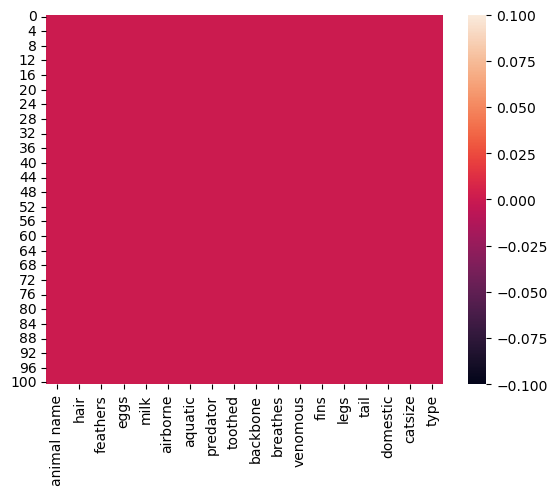

In [197]:
sns.heatmap(zoo.isnull())

In [198]:
corr=zoo.corr()
corr.head(8)

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
animal name,1.000000,-0.109112,0.058483,0.113466,-0.138181,0.048277,0.023475,-0.027931,-0.130423,-0.058669,0.080751,0.169083,-0.037985,-0.087070,0.092462,-0.206519,-0.027243,0.080012
hair,-0.109112,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.394009,0.048973,0.207208,0.455020,-0.562384
feathers,0.058483,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.104430,-0.613631,0.231403,0.254588,-0.145739,-0.223541,-0.206686,0.292569,0.031586,-0.135934,-0.197520
eggs,0.113466,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,0.011605,-0.642150,-0.340420,-0.382777,0.098689,0.164796,-0.224918,-0.221090,-0.155610,-0.514650,0.661825
milk,-0.138181,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.214196,0.210026,0.163928,0.574906,-0.723683
airborne,0.048277,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,0.008528,-0.251157,0.043712,0.009482,0.063274,-0.349768,0.022677
aquatic,0.023475,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.375978,0.053150,0.022463,-0.637506,0.087915,0.604492,-0.360638,-0.034642,-0.224308,-0.111866,0.326639
predator,-0.027931,-0.154769,-0.104430,0.011605,-0.029721,-0.295181,0.375978,1.000000,0.129452,0.051022,-0.262931,0.115391,0.190302,-0.099723,0.018947,-0.309794,0.144790,0.061179


<Axes: >

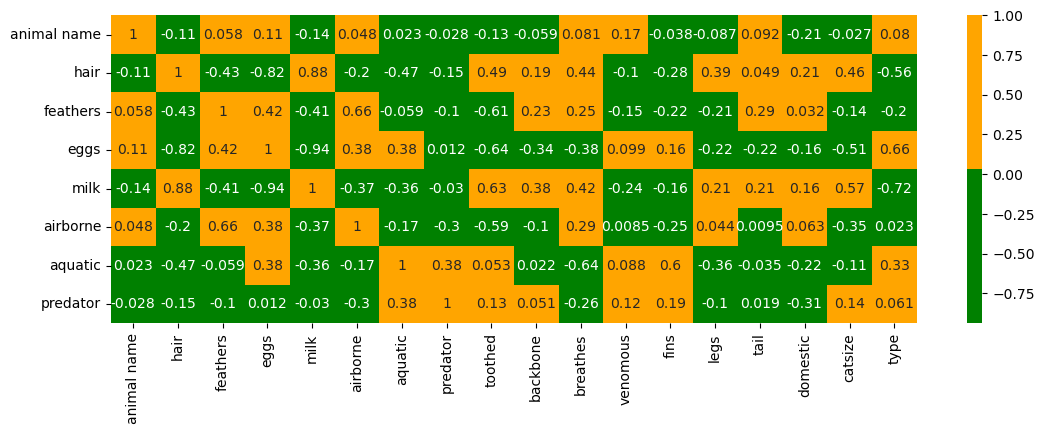

In [199]:
plt.figure(figsize=(13,4))
color=['green','orange']
pal=sns.color_palette(color)
sns.heatmap(corr.head(8),cmap=pal,annot=True)

# visualise the data

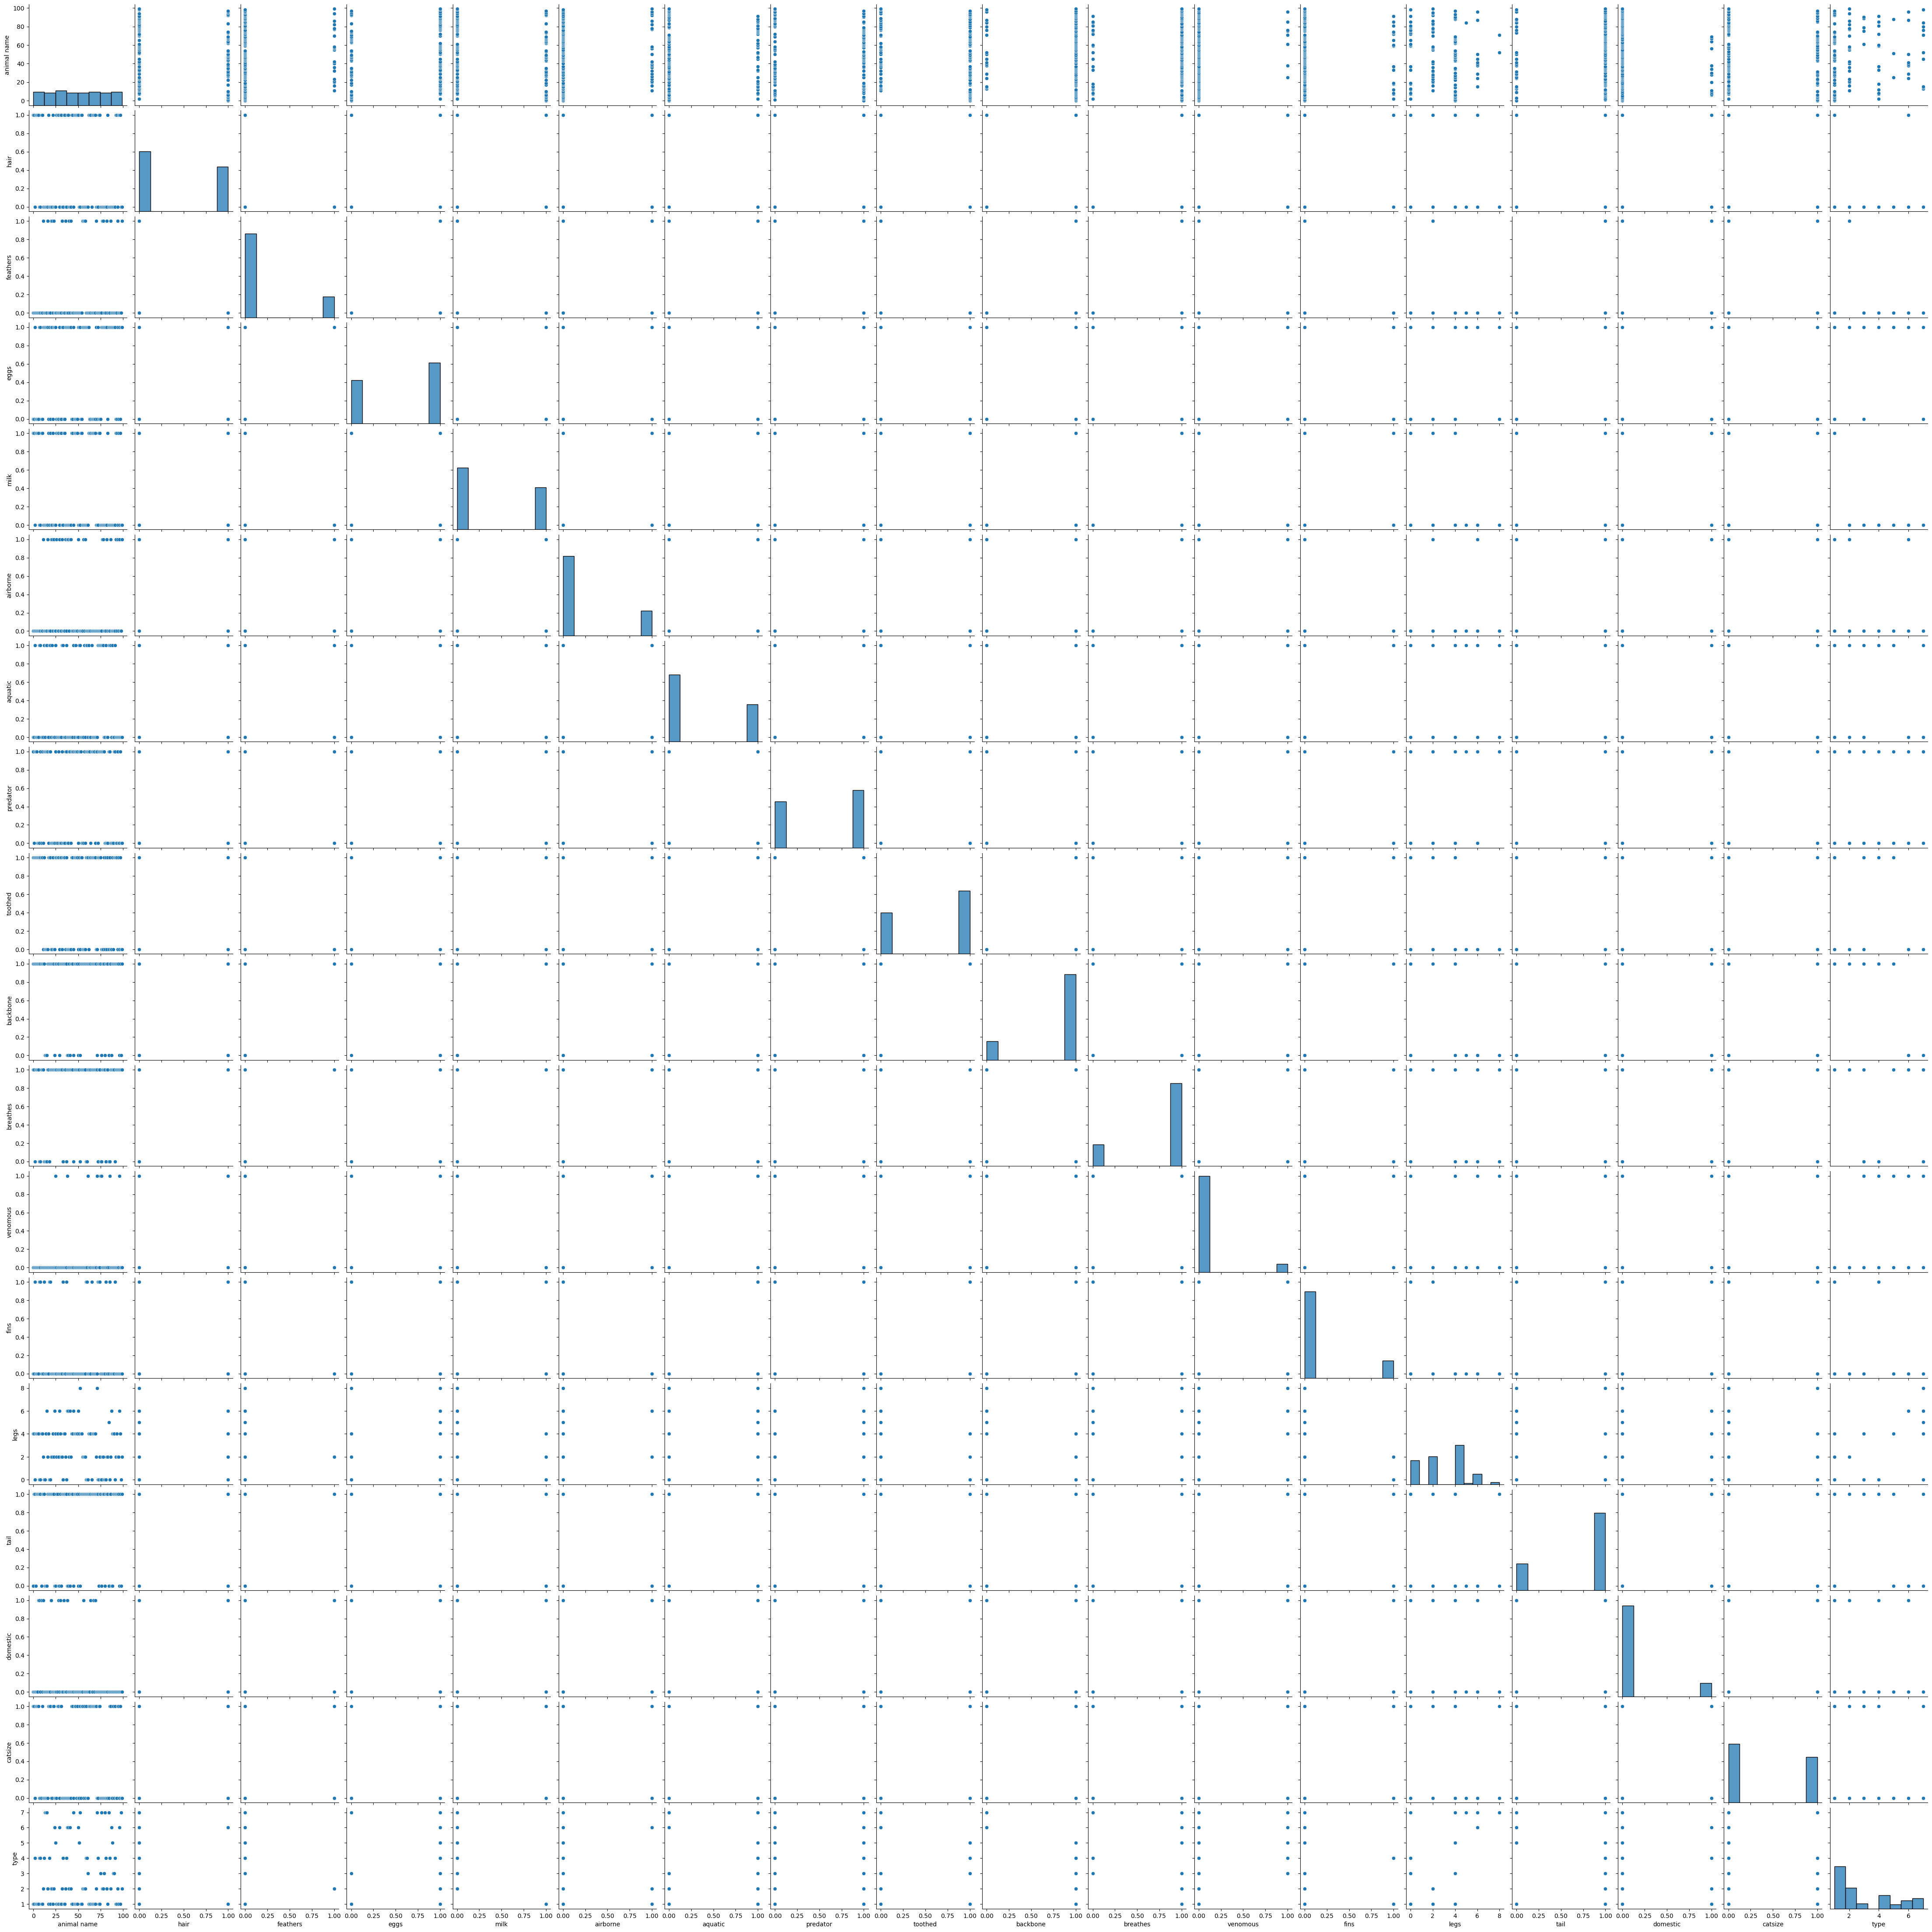

In [200]:
sns.pairplot(zoo)

<Axes: >

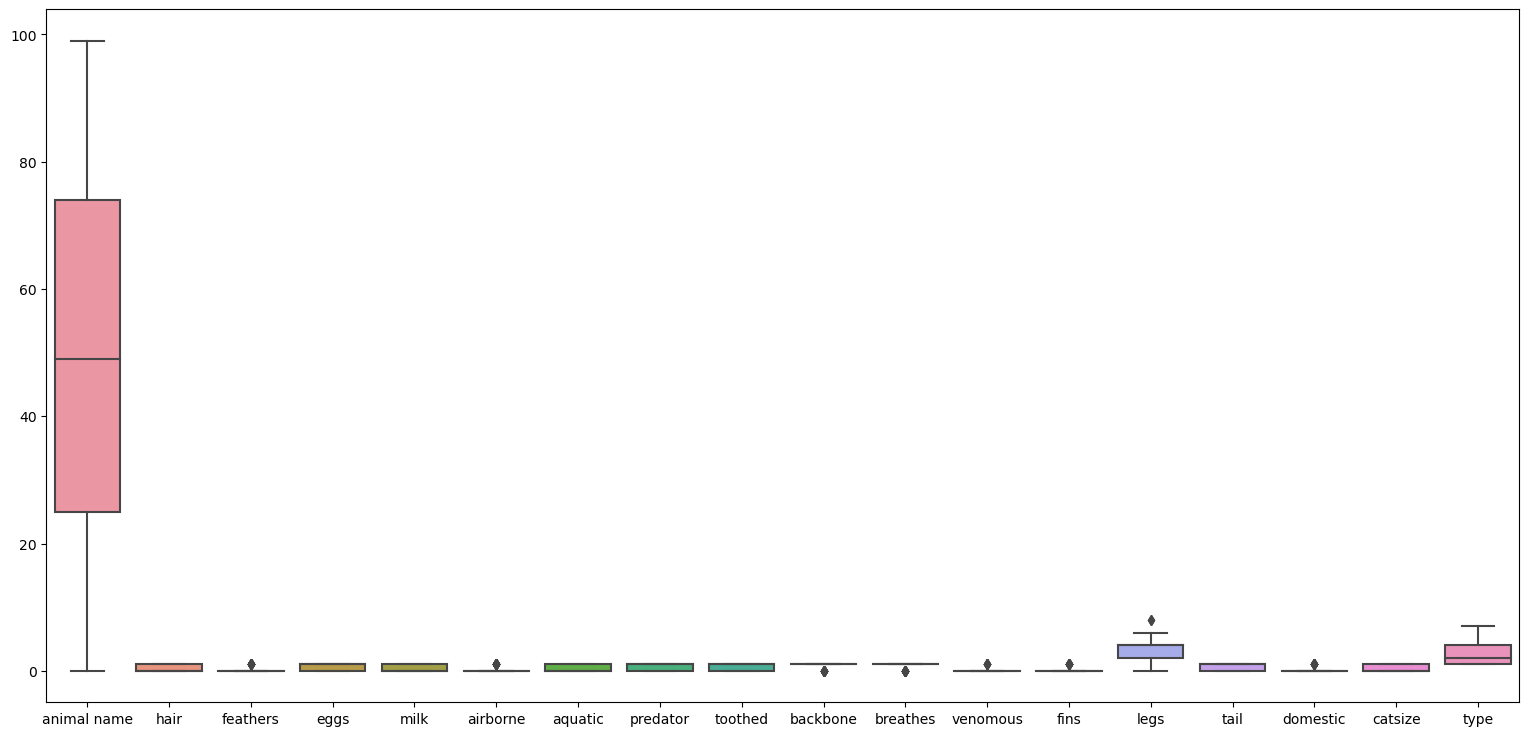

In [201]:
plt.figure(figsize=(19,9))
sns.boxplot(zoo)

### split the train and test data


In [202]:
x=zoo.iloc[:,1:17]
y=zoo.iloc[:,17]

In [203]:
x.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [204]:
y.head()

0    1
1    1
2    4
3    1
4    1
Name: type, dtype: int64

In [205]:
from sklearn.model_selection import train_test_split

In [206]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [207]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((80, 16), (21, 16), (80,), (21,))

In [208]:
x_train=x_train.values
x_train

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 1, 0, 1],
       [1, 0, 1, ..., 0, 0, 0]], dtype=int64)

In [209]:
x_test=x_test.values
x_test

array([[1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 2, 1, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 4, 1, 0, 1],
       [0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 4, 1, 0, 1],
       [1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 4, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 6, 0, 1, 0],
       [1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 4, 1, 0, 1],
       [1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 4, 1, 0, 1],
       [1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 4, 1, 0, 1],
       [1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 4, 0, 0, 1],
       [0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1],
       [0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 6, 0, 0, 0],
       [1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 6, 0, 0, 0],
       [0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0, 0],
       [0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 4, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 2, 1, 0, 0],
       [0, 1, 1, 0, 1, 1, 1, 0,

# Build the model


### classification model

In [210]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report

In [211]:
model=KNeighborsClassifier(n_neighbors=3)

In [212]:
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

### train the data 

In [213]:
train_pred=model.predict(x_train)

In [214]:
cm=confusion_matrix(y_train,train_pred)
cm

array([[29,  0,  0,  0,  0,  0,  0],
       [ 0, 18,  0,  0,  0,  0,  0],
       [ 0,  0,  3,  0,  1,  0,  0],
       [ 0,  0,  0, 11,  0,  0,  0],
       [ 0,  0,  0,  0,  4,  0,  0],
       [ 0,  0,  0,  0,  0,  5,  0],
       [ 0,  0,  0,  0,  0,  0,  9]], dtype=int64)

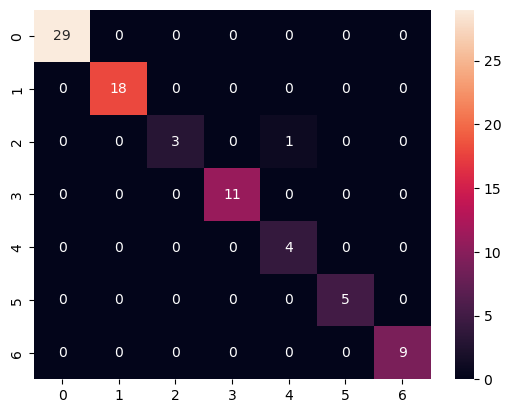

In [215]:
sns.heatmap(data=cm,annot=True)
plt.show()

In [216]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        18
           3       1.00      0.75      0.86         4
           4       1.00      1.00      1.00        11
           5       0.80      1.00      0.89         4
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         9

    accuracy                           0.99        80
   macro avg       0.97      0.96      0.96        80
weighted avg       0.99      0.99      0.99        80



### Test the data

In [217]:
test_pred=model.predict(x_test)

In [218]:
cm=confusion_matrix(y_test,test_pred)
cm

array([[12,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  3,  0],
       [ 0,  0,  0,  0,  0,  1]], dtype=int64)

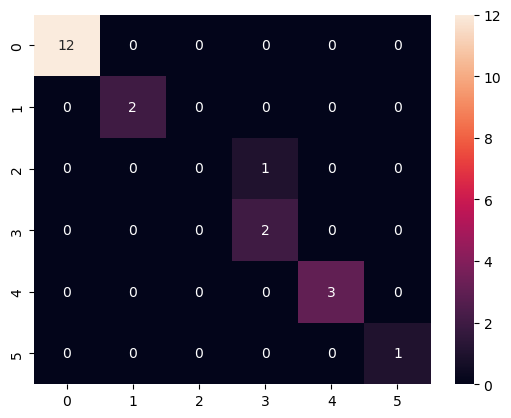

In [219]:
sns.heatmap(data=cm,annot=True)
plt.show()

In [220]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.78      0.83      0.80        21
weighted avg       0.92      0.95      0.93        21



### Elbow plot

In [221]:
tr_acc=[]
tst_acc=[]
for k in range(1,16):
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train,y_train)
    train_acc=model.score(x_train,y_train)
    test_acc=model.score(x_test,y_test)
    tr_acc.append(train_acc)
    tst_acc.append(test_acc)

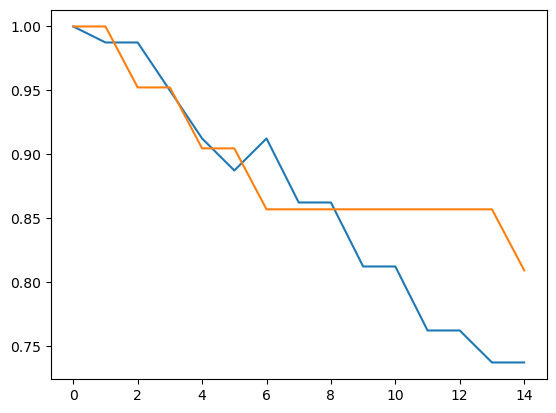

In [222]:
plt.plot(tr_acc)
plt.plot(tst_acc)
plt.show()

# Regression model

In [223]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [224]:
model = KNeighborsRegressor(n_neighbors=3)

In [225]:
model.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [226]:
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

In [227]:
train_pred

array([5.        , 5.        , 6.        , 1.        , 7.        ,
       6.        , 6.66666667, 1.        , 1.        , 2.        ,
       4.33333333, 1.        , 1.        , 2.        , 1.        ,
       1.        , 7.        , 1.        , 2.        , 7.        ,
       4.        , 4.        , 2.        , 4.        , 1.        ,
       2.        , 1.        , 5.        , 3.33333333, 1.        ,
       7.        , 6.        , 1.        , 1.        , 4.        ,
       4.        , 2.        , 1.        , 1.        , 1.        ,
       6.        , 2.        , 2.        , 1.        , 1.        ,
       1.        , 7.        , 1.        , 4.        , 1.        ,
       3.33333333, 2.        , 2.        , 1.        , 2.33333333,
       2.        , 1.        , 1.        , 2.        , 2.        ,
       1.        , 7.        , 2.        , 1.        , 1.        ,
       4.33333333, 2.        , 4.        , 2.        , 2.        ,
       7.        , 1.        , 4.        , 4.        , 2.     

In [228]:
test_pred

array([1.        , 1.        , 2.        , 1.        , 1.        ,
       6.        , 1.        , 1.        , 1.        , 1.        ,
       4.        , 6.        , 6.        , 2.        , 7.        ,
       1.        , 1.        , 2.        , 4.        , 1.        ,
       3.66666667])

In [229]:
train_mse = mean_squared_error(y_train,train_pred)
test_mse = mean_squared_error(y_test,test_pred)

In [230]:
train_mse

0.05555555555555556

In [231]:
test_mse

0.06878306878306877

In [232]:
tr_mse = []
ts_mse =[]
for k in range(1,15):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(x_train,y_train)
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)
    train_mse = mean_squared_error(y_train,train_pred)
    test_mse = mean_squared_error(y_test,test_pred)
    tr_mse.append(train_mse)
    ts_mse.append(test_mse)

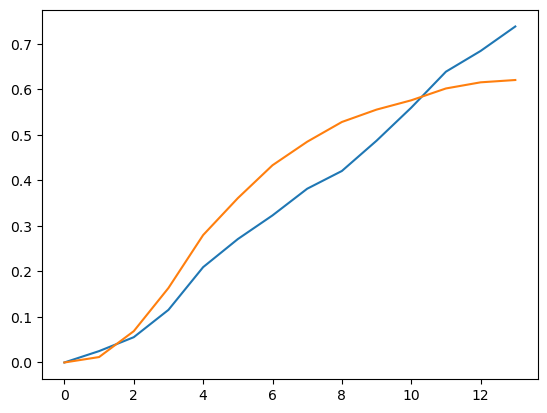

In [233]:
plt.plot(tr_mse)
plt.plot(ts_mse)
plt.show()

sqrt

In [234]:
import math

In [235]:
math.sqrt(train_mse), math.sqrt(test_mse)

(0.8592978861505812, 0.7878758146559189)

.


# ------------------------------------------------------------------------------------------------------------

Prepare a model for glass classification using KNN

Data Description:

RI : refractive index

Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

Mg: Magnesium

AI: Aluminum

Si: Silicon

K:Potassium

Ca: Calcium

Ba: Barium

Fe: Iron

# glass data

In [98]:
glass=pd.read_csv('glass.csv')

In [99]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [100]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [101]:
glass.shape

(214, 10)

In [102]:
glass.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
209    False
210    False
211    False
212    False
213    False
Length: 214, dtype: bool

In [103]:
glass.duplicated().sum()

1

In [104]:
glass[glass.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [105]:
glass.drop_duplicates(inplace=True)

In [106]:
glass.reset_index(drop=True,inplace=True)

In [107]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [108]:
glass.duplicated().sum()

0

null values

In [109]:
glass.isnull()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
208,False,False,False,False,False,False,False,False,False,False
209,False,False,False,False,False,False,False,False,False,False
210,False,False,False,False,False,False,False,False,False,False
211,False,False,False,False,False,False,False,False,False,False


<Axes: >

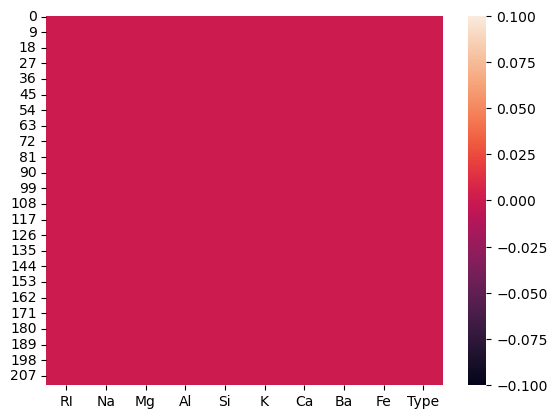

In [110]:
sns.heatmap(glass.isnull())

In [111]:
glass.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.012455
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.002677
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.574896
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.191090
Type,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090,1.000000


<Axes: >

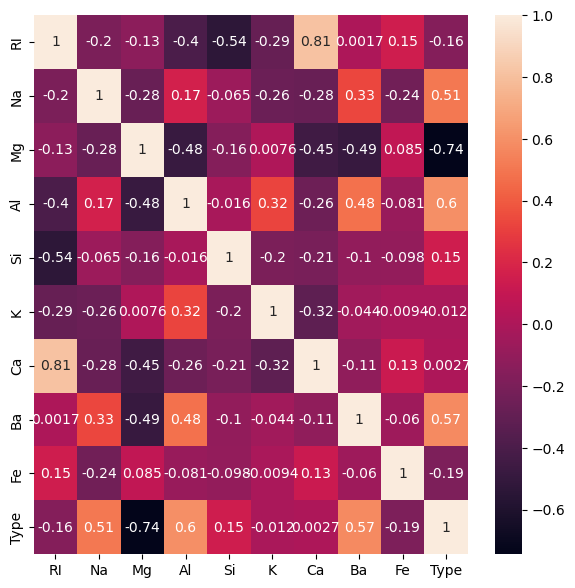

In [112]:
plt.figure(figsize=(7,7))
sns.heatmap(glass.corr(),annot=True)

# visualise the data

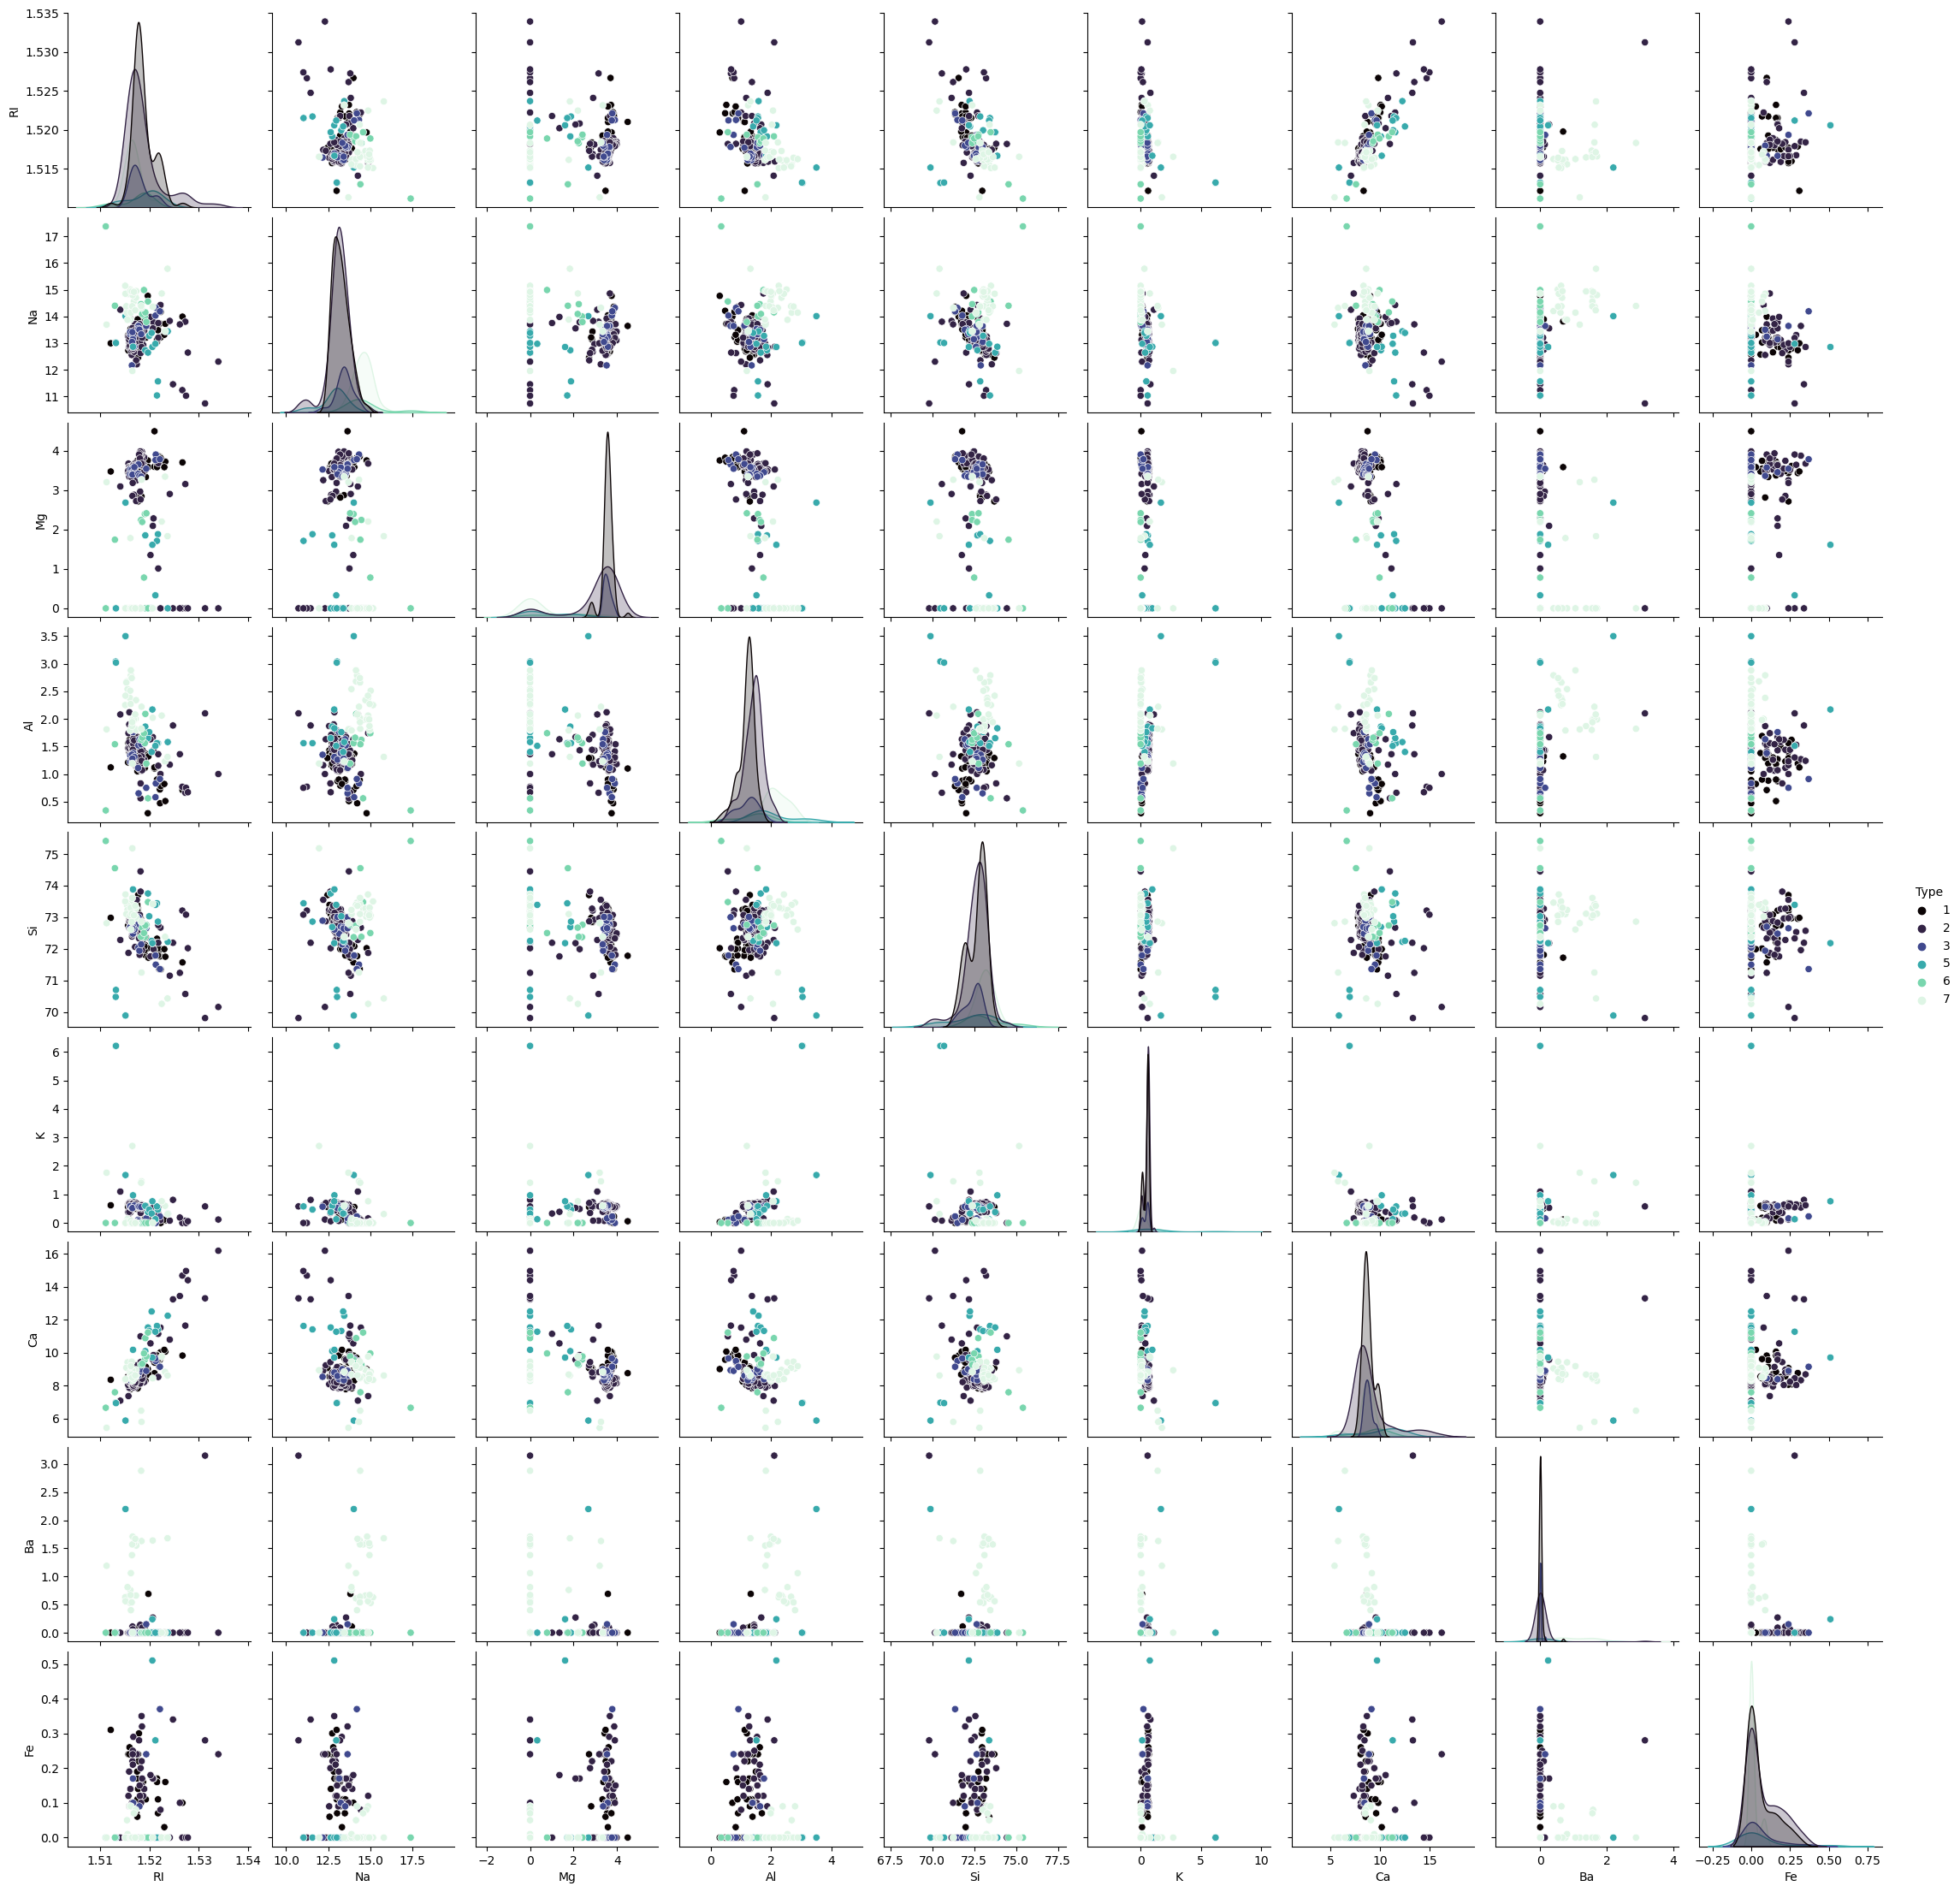

In [113]:
sns.pairplot(glass,palette='mako',hue='Type')
plt.show()

<Axes: >

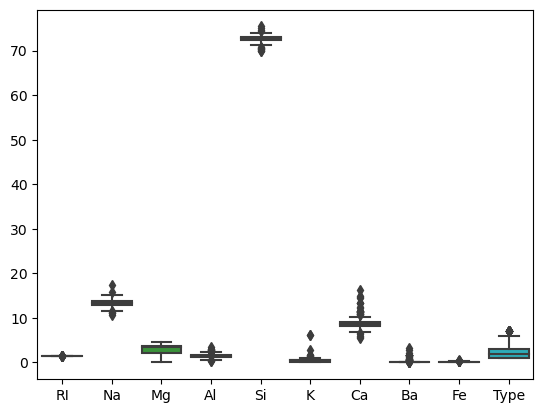

In [114]:
sns.boxplot(data = glass)

### split the train and test data

In [134]:
X=glass.iloc[:,0:9]
y=glass.iloc[:,9]

In [135]:
X.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [136]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Type, dtype: int64

In [137]:
from sklearn.model_selection import train_test_split

In [138]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((170, 9), (43, 9), (170,), (43,))

In [139]:
X_train=X_train.values
X_train[5]

array([ 1.5202, 13.98  ,  1.35  ,  1.63  , 71.76  ,  0.39  , 10.56  ,
        0.    ,  0.18  ])

In [140]:
X_test=X_test.values
X_test[5]

array([1.52777e+00, 1.26400e+01, 0.00000e+00, 6.70000e-01, 7.20200e+01,
       6.00000e-02, 1.44000e+01, 0.00000e+00, 0.00000e+00])

 # build the model

# Classifier model

In [141]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report

In [155]:
model=KNeighborsClassifier(n_neighbors=10)

In [156]:
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

### Train the data

In [157]:
train_pred=model.predict(X_train)
train_pred

array([2, 1, 5, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 5, 1, 2, 1, 1, 7, 2,
       2, 1, 5, 5, 1, 2, 1, 1, 1, 2, 1, 3, 1, 2, 5, 2, 1, 1, 2, 1, 1, 2,
       2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 7, 1, 1, 1, 2, 1, 1, 7, 7, 1, 1,
       2, 7, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 7, 2, 2, 5, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 7, 1, 3, 2, 1, 1, 2, 2, 1, 2, 7, 5, 7, 1,
       2, 1, 1, 5, 2, 2, 2, 7, 2, 2, 1, 3, 7, 2, 1, 5, 2, 7, 2, 1, 7, 1,
       1, 2, 1, 5, 7, 5, 2, 1, 2, 1, 1, 3, 7, 2, 2, 1, 1, 7, 2, 1, 2, 2,
       1, 1, 1, 2, 2, 2, 2, 7, 1, 7, 2, 2, 1, 2, 2, 1], dtype=int64)

In [158]:
cm=confusion_matrix(y_train,train_pred)
cm

array([[50,  8,  1,  0,  0,  0],
       [16, 41,  1,  3,  0,  0],
       [11,  1,  2,  0,  0,  0],
       [ 0,  3,  0,  7,  0,  0],
       [ 2,  1,  0,  1,  0,  2],
       [ 1,  3,  0,  0,  0, 16]], dtype=int64)

<Axes: >

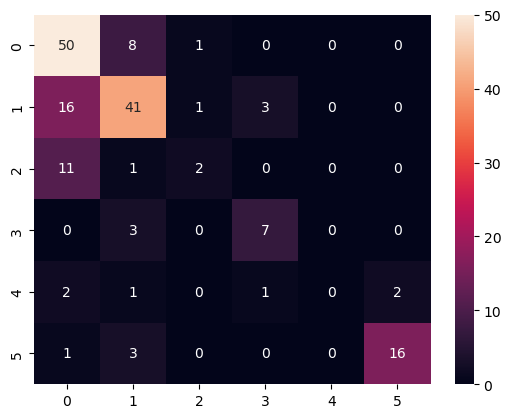

In [159]:
sns.heatmap(data=cm,annot=True)

In [160]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           1       0.62      0.85      0.72        59
           2       0.72      0.67      0.69        61
           3       0.50      0.14      0.22        14
           5       0.64      0.70      0.67        10
           6       0.00      0.00      0.00         6
           7       0.89      0.80      0.84        20

    accuracy                           0.68       170
   macro avg       0.56      0.53      0.52       170
weighted avg       0.66      0.68      0.66       170



### Test the data

In [161]:
test_pred=model.predict(X_test)
test_pred

array([1, 7, 1, 7, 2, 2, 1, 2, 2, 2, 5, 2, 1, 2, 1, 5, 7, 1, 1, 2, 1, 7,
       7, 7, 1, 5, 1, 1, 1, 1, 1, 2, 1, 1, 2, 7, 2, 1, 1, 2, 1, 2, 1],
      dtype=int64)

In [162]:
cm=confusion_matrix(y_test,test_pred)
cm

array([[10,  0,  0,  0,  0,  0],
       [ 5,  9,  0,  1,  0,  0],
       [ 3,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  1,  0,  0],
       [ 2,  0,  0,  1,  0,  0],
       [ 0,  2,  0,  0,  0,  7]], dtype=int64)

<Axes: >

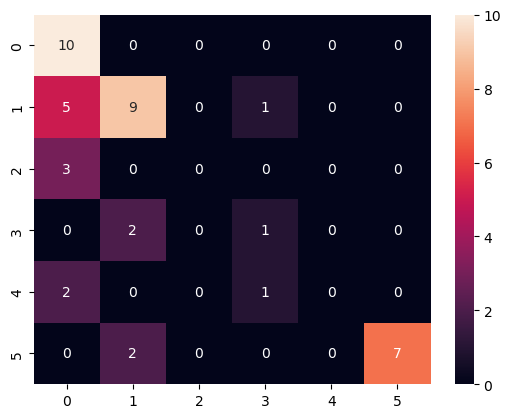

In [163]:
sns.heatmap(data=cm,annot=True)

In [164]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           1       0.50      1.00      0.67        10
           2       0.69      0.60      0.64        15
           3       0.00      0.00      0.00         3
           5       0.33      0.33      0.33         3
           6       0.00      0.00      0.00         3
           7       1.00      0.78      0.88         9

    accuracy                           0.63        43
   macro avg       0.42      0.45      0.42        43
weighted avg       0.59      0.63      0.59        43



### Elow plot

In [166]:
tr_acc=[]
tst_acc=[]
for k in range(1,16):
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    train_acc=model.score(X_train,y_train)
    test_acc=model.score(X_test,y_test)
    tr_acc.append(train_acc)
    tst_acc.append(test_acc)

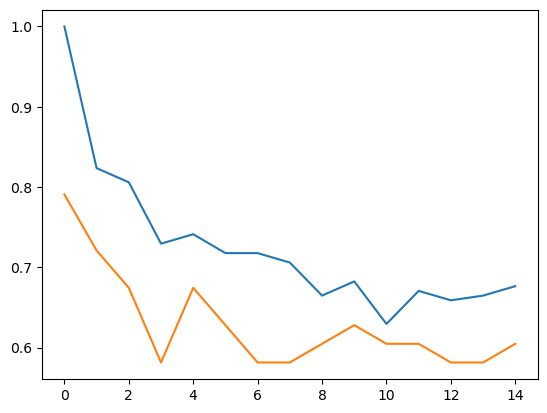

In [167]:
plt.plot(tr_acc)
plt.plot(tst_acc)
plt.show()

# Regression model

In [168]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [169]:
model = KNeighborsRegressor(n_neighbors=3)

In [174]:
model.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=14)

In [176]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [177]:
train_pred

array([1.92857143, 1.42857143, 3.5       , 3.07142857, 2.21428571,
       4.14285714, 1.78571429, 1.42857143, 1.78571429, 1.21428571,
       2.        , 1.5       , 1.78571429, 2.35714286, 1.14285714,
       3.92857143, 1.28571429, 1.78571429, 1.28571429, 1.28571429,
       7.        , 3.14285714, 1.78571429, 1.28571429, 4.92857143,
       4.71428571, 1.14285714, 1.64285714, 1.78571429, 1.07142857,
       1.28571429, 1.92857143, 1.42857143, 2.07142857, 2.        ,
       1.78571429, 4.07142857, 1.85714286, 1.78571429, 1.42857143,
       1.78571429, 2.71428571, 1.71428571, 1.85714286, 2.        ,
       1.78571429, 1.71428571, 1.57142857, 1.42857143, 2.28571429,
       1.92857143, 1.71428571, 1.71428571, 1.21428571, 2.21428571,
       7.        , 1.14285714, 1.21428571, 1.57142857, 2.        ,
       1.        , 1.07142857, 6.85714286, 4.92857143, 1.57142857,
       1.28571429, 1.92857143, 7.        , 1.71428571, 1.64285714,
       1.21428571, 2.        , 1.21428571, 2.        , 1.35714

In [178]:
test_pred

array([1.57142857, 7.        , 1.42857143, 7.        , 2.14285714,
       3.78571429, 1.28571429, 1.92857143, 2.        , 1.64285714,
       4.64285714, 3.71428571, 1.42857143, 1.78571429, 3.14285714,
       4.92857143, 7.        , 2.        , 2.21428571, 2.21428571,
       1.28571429, 7.        , 7.        , 7.        , 1.        ,
       3.78571429, 1.        , 1.28571429, 2.57142857, 1.        ,
       1.28571429, 1.78571429, 2.28571429, 1.35714286, 1.71428571,
       7.        , 3.5       , 1.71428571, 1.42857143, 1.92857143,
       1.28571429, 4.21428571, 2.07142857])

In [179]:
train_mse = mean_squared_error(y_train,train_pred)
test_mse = mean_squared_error(y_test,test_pred)

In [180]:
train_mse

1.2551920768307325

In [181]:
test_mse

1.7597294731846225

In [182]:
tr_mse = []
ts_mse =[]
for k in range(1,15):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train,y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    train_mse = mean_squared_error(y_train,train_pred)
    test_mse = mean_squared_error(y_test,test_pred)
    tr_mse.append(train_mse)
    ts_mse.append(test_mse)

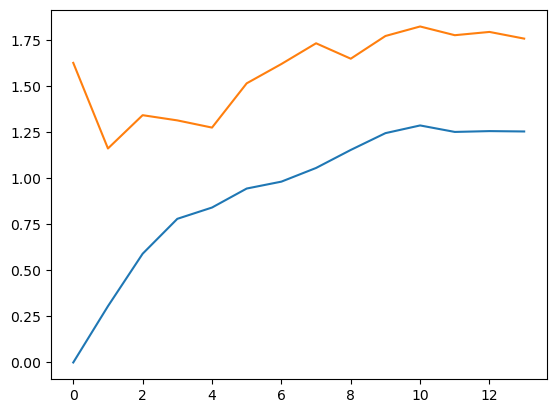

In [183]:
plt.plot(tr_mse)
plt.plot(ts_mse)
plt.show()